In [1]:
import numpy as np
import pandas as pd
import joblib
from crabnet.crabnet_ import CrabNet
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from matplotlib import pyplot as plt

/homes/kaiyuana001/.conda/envs/crabnet/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_excel('estm.xlsx')
df

,Formula,temperature(K),seebeck_coefficient(μV/K),electrical_conductivity(S/m),thermal_conductivity(W/mK),power_factor(W/mK2),ZT,reference
0,BiSb(Se0.92Br0.08)3,300.0,-110.00,27766.0,0.6300,0.000336,0.159985,10.1002/adfm.201806558
1,BiSb(Se0.92Br0.08)3,400.0,-138.00,23883.0,0.5700,0.000455,0.319177,10.1002/adfm.201806558
2,BiSb(Se0.92Br0.08)3,500.0,-163.00,20850.0,0.5300,0.000554,0.522607,10.1002/adfm.201806558
3,BiSb(Se0.92Br0.08)3,600.0,-181.00,19000.0,0.5100,0.000622,0.732305,10.1002/adfm.201806558
4,BiSb(Se0.92Br0.08)3,700.0,-193.00,17925.0,0.5000,0.000668,0.940000,10.1002/adfm.201806558
...,...,...,...,...,...,...,...,...
5200,Ge9Sb2Te12,423.0,77.28,173636.0,2.8586,0.001037,0.153448,https://doi.org/10.1021/acsami.0c02155
5201,Ge9Sb2Te12,525.0,97.50,136364.0,2.7576,0.001296,0.246795,https://doi.org/10.1021/acsami.0c02155
5202,Ge9Sb2Te12,625.0,112.88,120000.0,2.8232,0.001529,0.338496,https://doi.org/10.1021/acsami.0c02155
5203,Ge9Sb2Te12,725.0,135.19,108182.0,2.5354,0.001977,0.565374,https://doi.org/10.1021/acsami.0c02155


In [3]:
df1 = df[df['temperature(K)']<350]
df1 = df1[df1['temperature(K)']>100]
df1

,Formula,temperature(K),seebeck_coefficient(μV/K),electrical_conductivity(S/m),thermal_conductivity(W/mK),power_factor(W/mK2),ZT,reference
0,BiSb(Se0.92Br0.08)3,300.0,-110.00,27766.0,0.6300,0.000336,0.159985,10.1002/adfm.201806558
6,BiSb(Se0.94Br0.06)3,300.0,-112.00,26117.0,0.6400,0.000328,0.153568,10.1002/adfm.201806558
12,BiSb(Se0.96Br0.04)3,300.0,-100.00,21000.0,0.6500,0.000210,0.120000,10.1002/adfm.201806558
18,BiSb(Se0.98Br0.02)3,300.0,-109.00,21915.0,0.6800,0.000260,0.120000,10.1002/adfm.201806558
24,Cu2.025Cd0.975SnSe4,300.0,173.00,5362.0,2.6730,0.000160,0.018011,10.1002/adma.200900409
...,...,...,...,...,...,...,...,...
5175,(Sn0.985In0.015Te)0.9(AgCl)0.1,323.0,57.37,464045.0,3.8889,0.001527,0.126854,https://doi.org/10.1021/acsami.0c09781
5181,(Sn0.985In0.015Te)0.85(AgCl)0.15,323.0,58.53,420225.0,4.0000,0.001440,0.116247,https://doi.org/10.1021/acsami.0c09781
5187,Cu2SnSe3,323.0,89.29,13265.0,2.8264,0.000106,0.012086,https://doi.org/10.1021/acsami.0c04298
5193,Cu2Sn0.95Fe0.05Se3,323.0,55.48,115306.0,3.4280,0.000355,0.033442,https://doi.org/10.1021/acsami.0c04298


In [15]:
df1['electrical_conductivity(S/m)'] = np.log(df1['electrical_conductivity(S/m)'])
df1

,Formula,temperature(K),seebeck_coefficient(μV/K),electrical_conductivity(S/m),thermal_conductivity(W/mK),power_factor(W/mK2),ZT,reference
3315,Sn1.03Se0.12Te0.88,323.0,13.53,13.178644,5.1635,9.682951e-05,0.006057,https://doi.org/10.1021/acsaem.1c02442
1044,TlCr5Se8,323.0,226.00,8.805375,0.7060,3.406769e-04,0.155862,dx.doi.org/10.1021/cm400365q
1054,LaCo0.8(Ni0.5Fe0.5)0.2O3,300.0,234.00,7.229839,0.1568,7.556328e-05,0.157700,dx.doi.org/10.1021/jp3021408
2439,Cu2ZnSnSe4,323.0,105.92,9.952659,4.5670,2.356897e-04,0.016669,https://doi.org/10.1021/acs.inorgchem.1c00079
1209,CrO0.09N0.9,150.0,-45.20,10.091915,4.1940,4.933329e-05,0.001764,https://doi.org/10.1016/j.actamat.2010.10.046
...,...,...,...,...,...,...,...,...
1321,CoSi0.995B0.005,320.0,-82.28,13.466379,14.0600,4.774880e-03,0.107800,https://doi.org/10.1016/j.jallcom.2004.09.036
4981,GeSe,326.0,774.26,1.142502,2.8447,1.879125e-06,0.000215,https://doi.org/10.1021/acsami.0c10850
4818,BiCuSeO,250.0,164.43,2.041467,1.5414,2.082380e-07,0.000034,https://doi.org/10.1021/acsami.0c22861
3756,(SnTe)0.96(CuSbTe2)0.04,321.0,28.57,12.997269,5.6273,3.601330e-04,0.020543,https://doi.org/10.1021/acsami.1c15614


In [17]:
df1 = df1.sample(frac=1)
 
df_train = df1[:600].copy()
df_test = df1[600:].copy()



Model architecture: out_dims, d_model, N, heads
3, 512, 3, 4
Running on compute device: cpu
Model size: 11987206 parameters



Generating EDM: 100%|██████████| 600/600 [00:00<00:00, 64206.72formulae/s]


loading data with up to 6 elements in the formula
training with batchsize 128 (2**7.000)


Generating EDM: 100%|██████████| 226/226 [00:00<00:00, 66745.02formulae/s]

loading data with up to 6 elements in the formula
stepping every 50 training passes, cycling lr every 10 epochs
running for 300 epochs, unless early stopping occurs
checkin at 20 epochs to match lr scheduler


Epoch: 0/300 --- train mae: 150 val mae: 141


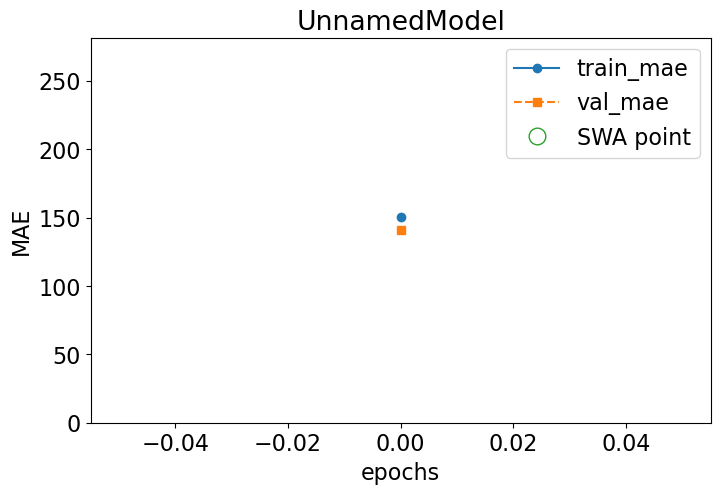

Epoch: 19/300 --- train mae: 86.9 val mae: 100


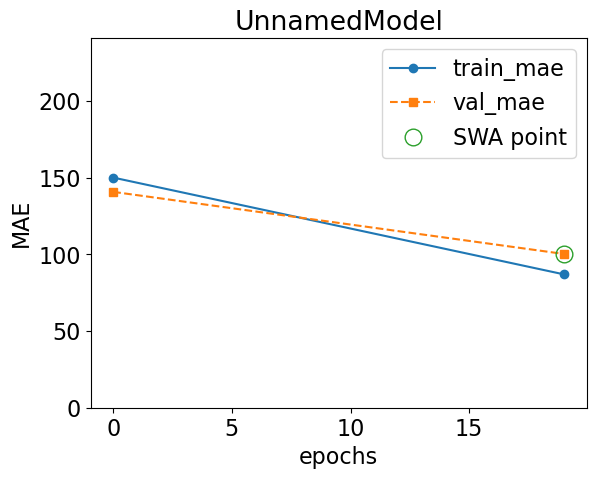

Epoch: 39/300 --- train mae: 49.1 val mae: 80.8


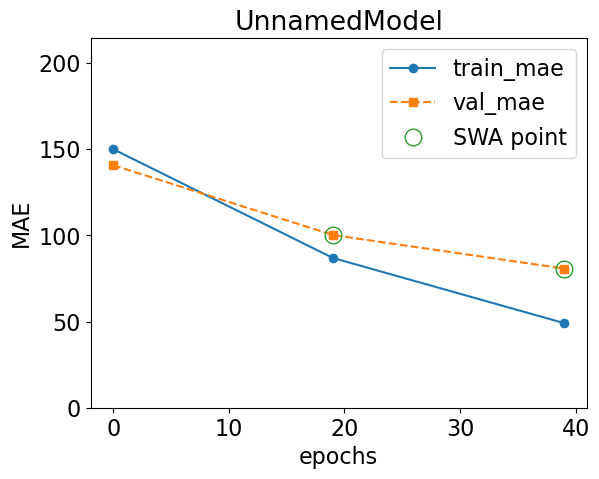

Epoch: 59/300 --- train mae: 30 val mae: 61.7


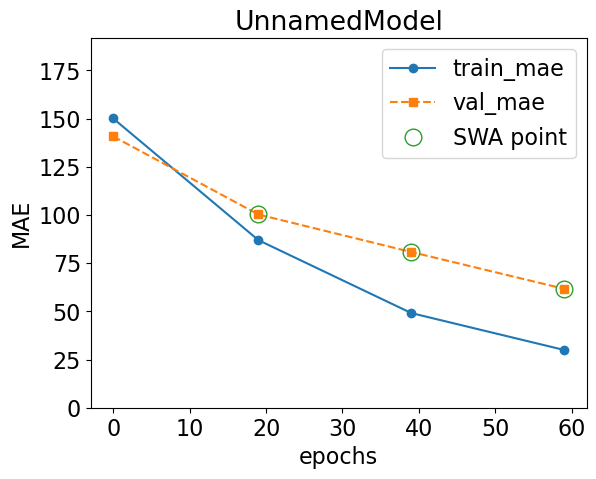

Epoch: 79/300 --- train mae: 23.6 val mae: 56


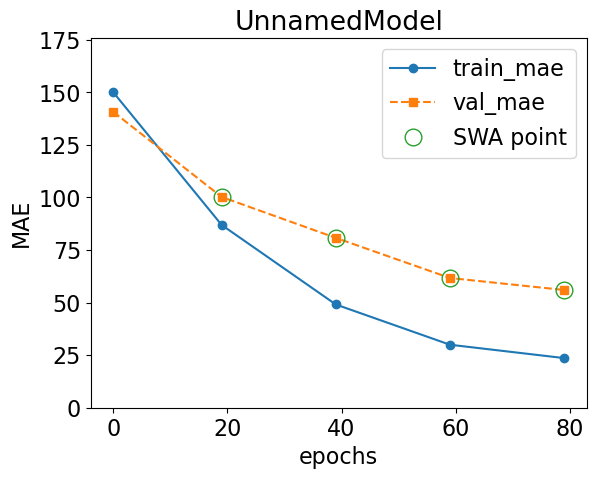

Epoch: 99/300 --- train mae: 18.3 val mae: 55


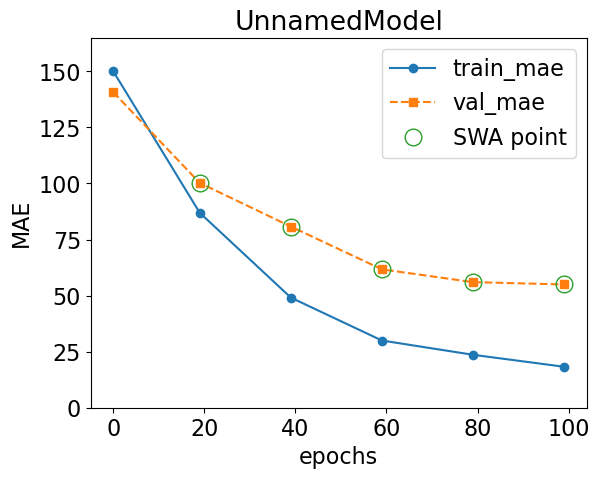

Epoch 119 failed to improve.
Discarded: 1/3 weight updates
Epoch: 119/300 --- train mae: 14.8 val mae: 57.6


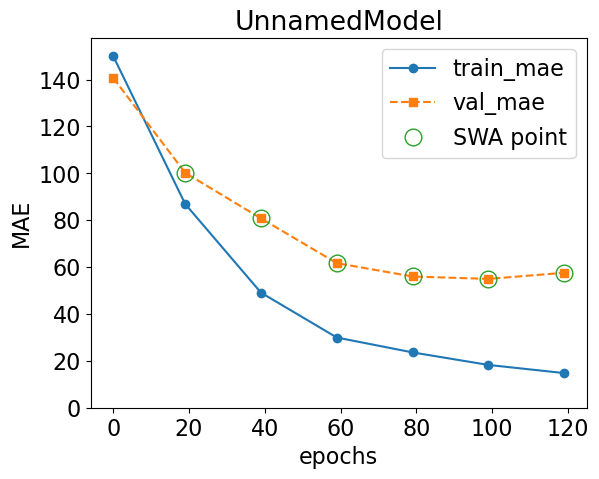

Epoch 139 failed to improve.
Discarded: 2/3 weight updates
Epoch: 139/300 --- train mae: 11.6 val mae: 56.2


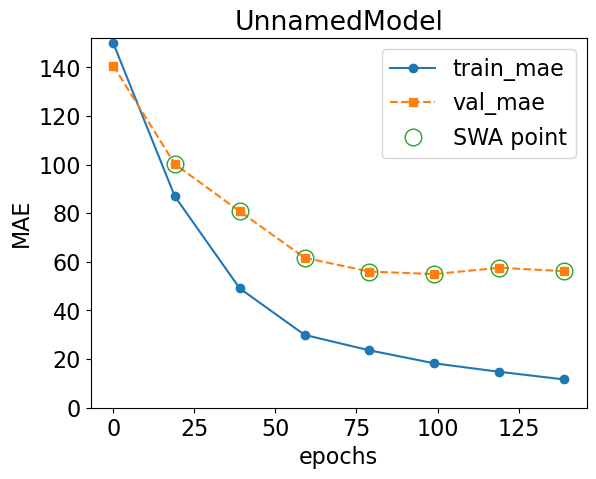

Epoch 159 failed to improve.
Discarded: 3/3 weight updates
Epoch: 159/300 --- train mae: 10.3 val mae: 58.4


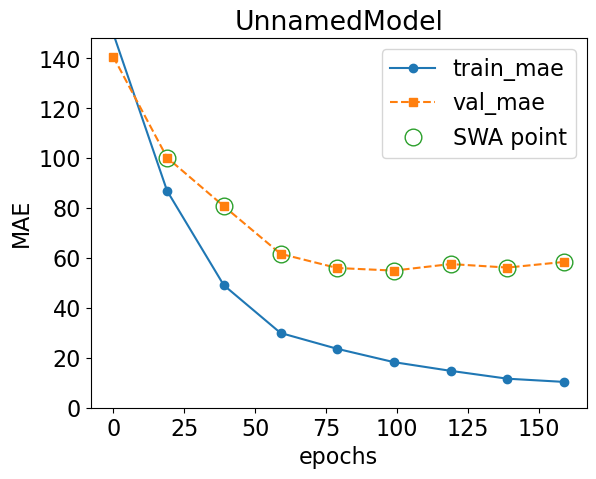

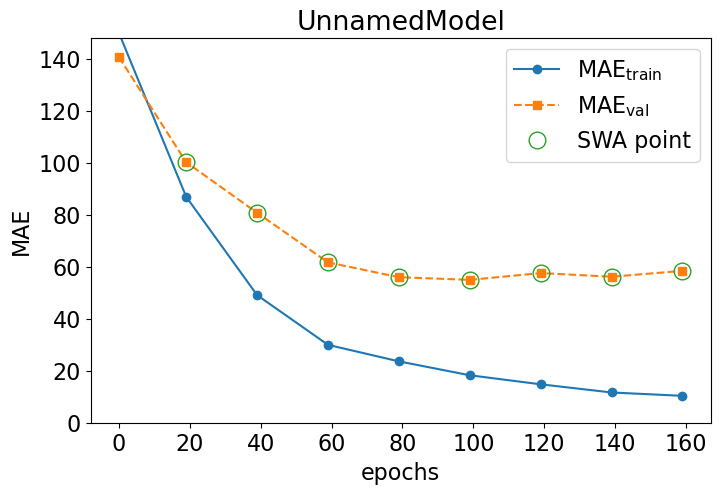

Discarded: 3/3weight updates, early-stopping now
Saving network (UnnamedModel) to models/trained_models/UnnamedModel.pth

Model architecture: out_dims, d_model, N, heads
3, 512, 3, 4
Running on compute device: cpu
Model size: 11987206 parameters



Generating EDM: 100%|██████████| 600/600 [00:00<00:00, 84639.37formulae/s]


loading data with up to 6 elements in the formula
training with batchsize 128 (2**7.000)


Generating EDM: 100%|██████████| 226/226 [00:00<00:00, 88822.40formulae/s]

loading data with up to 6 elements in the formula
stepping every 50 training passes, cycling lr every 10 epochs
running for 300 epochs, unless early stopping occurs
checkin at 20 epochs to match lr scheduler


Epoch: 0/300 --- train mae: 2.13 val mae: 1.91


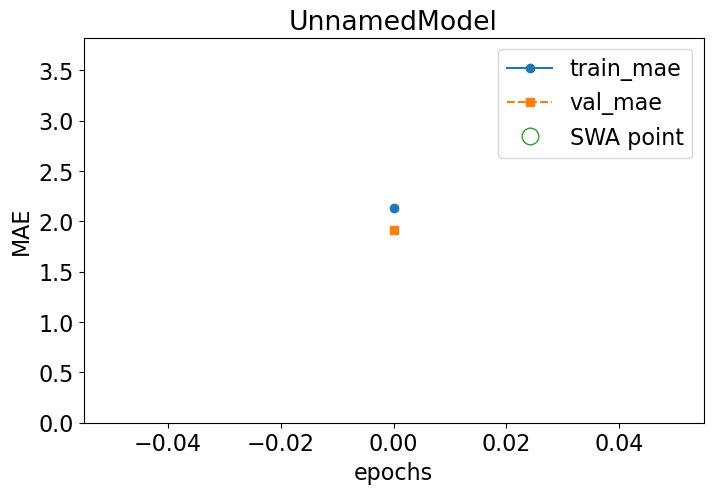

Epoch: 19/300 --- train mae: 1.1 val mae: 1.4


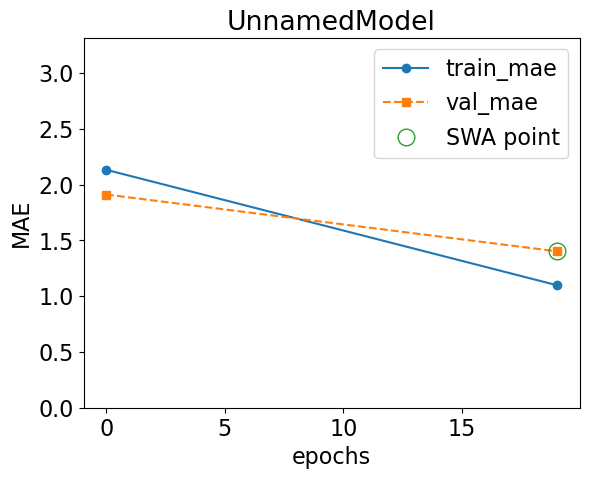

Epoch: 39/300 --- train mae: 0.642 val mae: 1.12


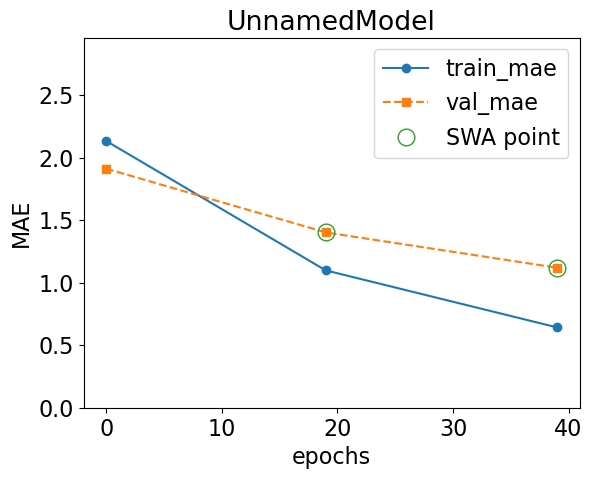

Epoch: 59/300 --- train mae: 0.421 val mae: 0.987


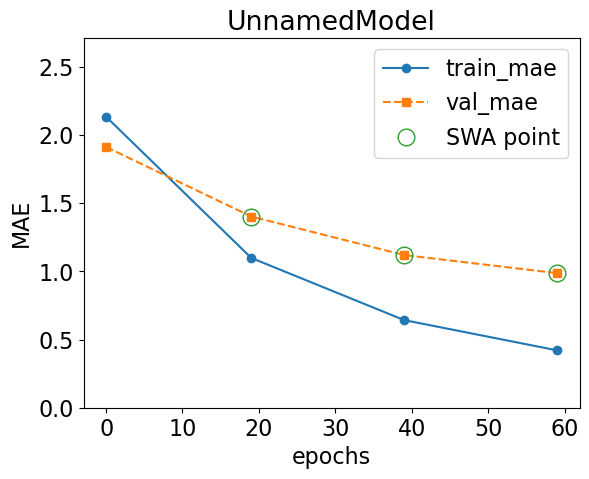

Epoch: 79/300 --- train mae: 0.319 val mae: 0.988


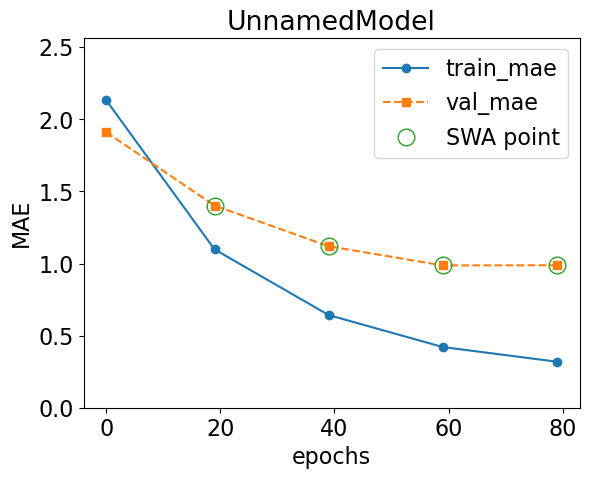

Epoch: 99/300 --- train mae: 0.267 val mae: 0.962


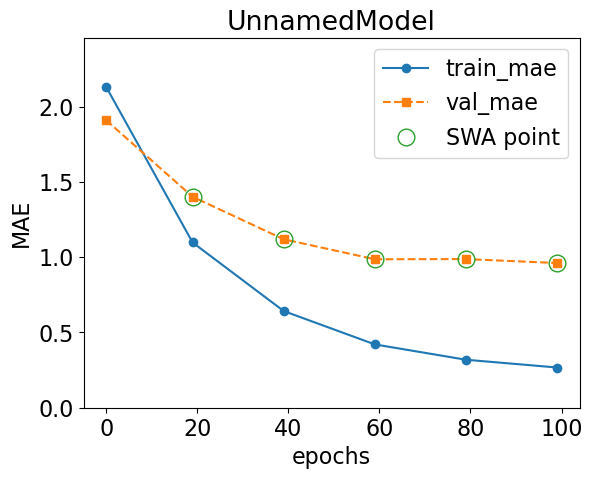

Epoch: 119/300 --- train mae: 0.218 val mae: 0.944


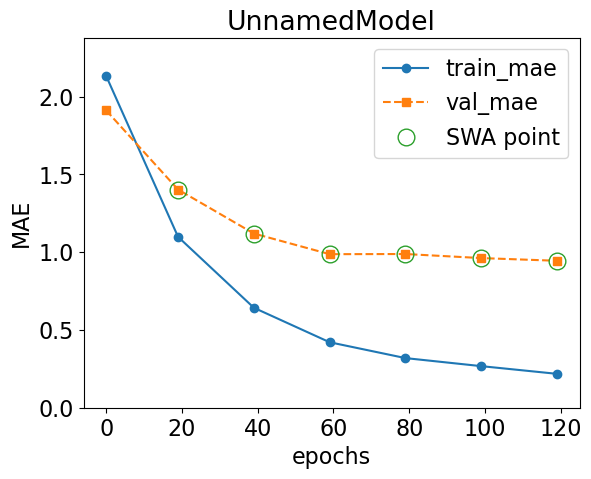

Epoch 139 failed to improve.
Discarded: 1/3 weight updates
Epoch: 139/300 --- train mae: 0.199 val mae: 0.98


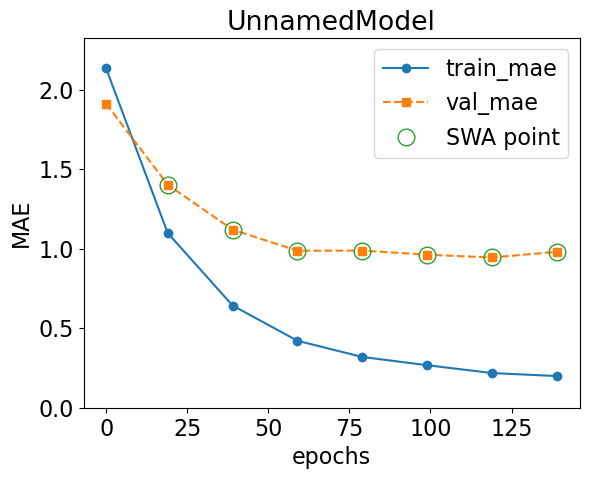

Epoch: 159/300 --- train mae: 0.189 val mae: 0.953


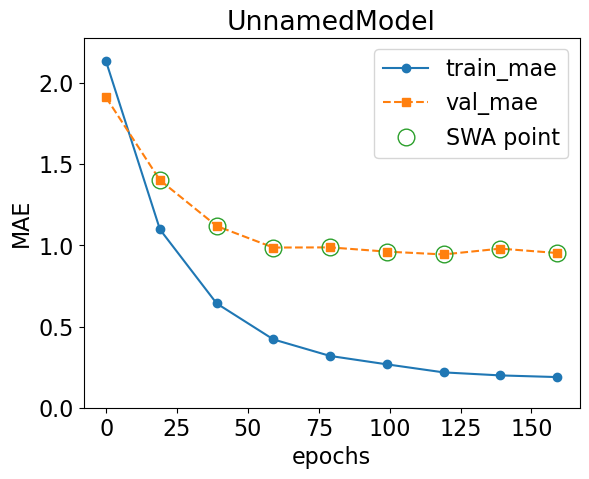

Epoch: 179/300 --- train mae: 0.173 val mae: 0.958


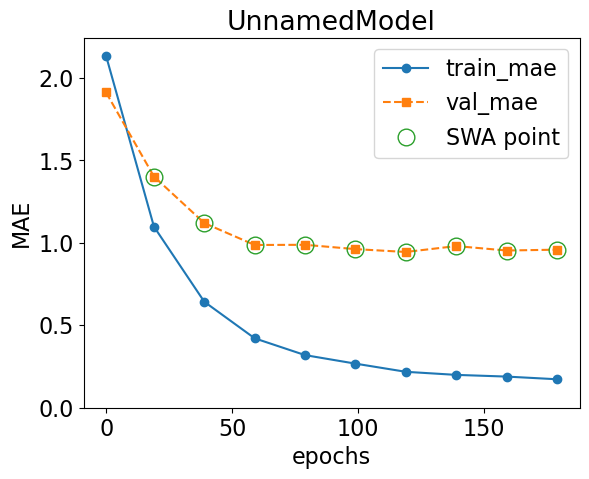

Epoch: 199/300 --- train mae: 0.159 val mae: 0.93


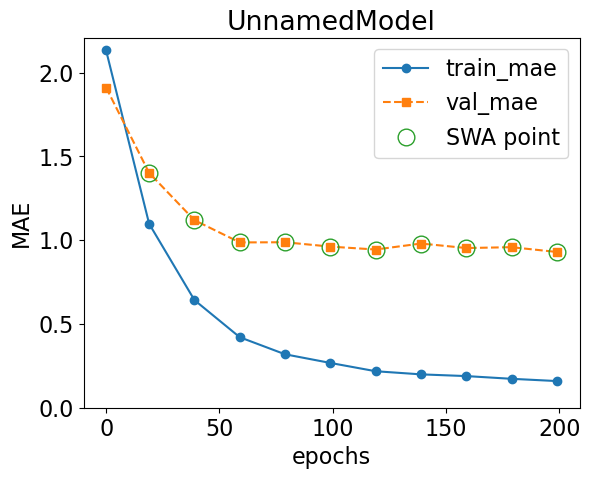

Epoch 219 failed to improve.
Discarded: 2/3 weight updates
Epoch: 219/300 --- train mae: 0.155 val mae: 0.948


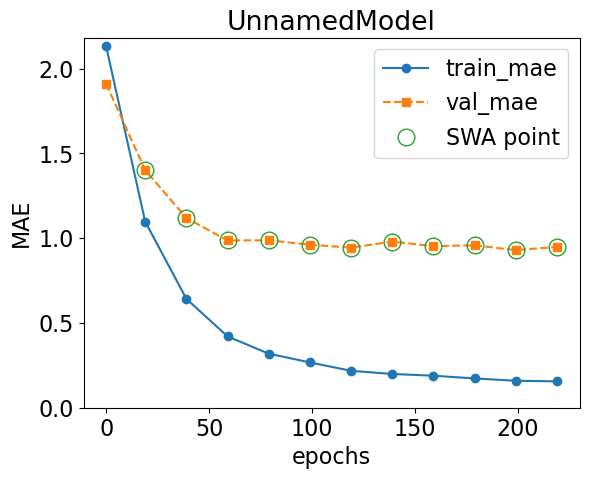

Epoch 239 failed to improve.
Discarded: 3/3 weight updates
Epoch: 239/300 --- train mae: 0.156 val mae: 0.94


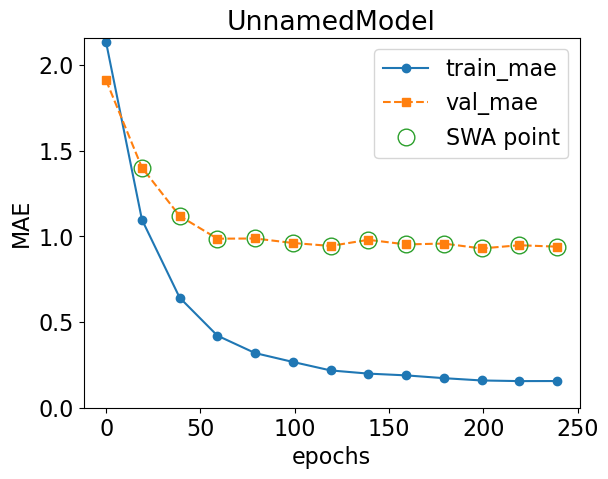

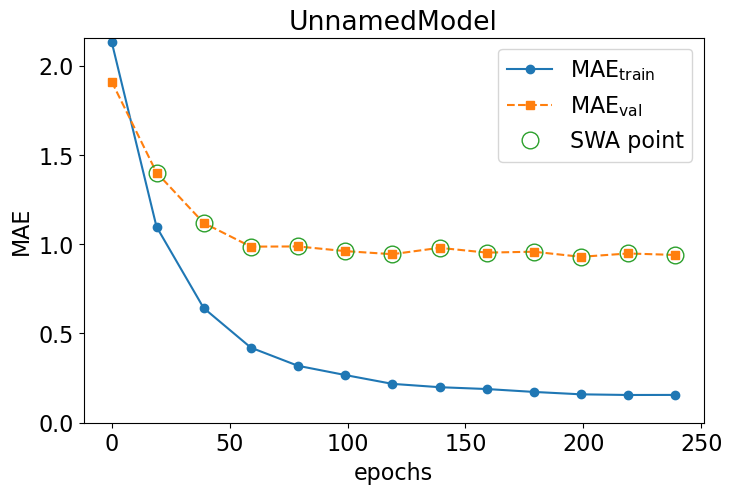

Discarded: 3/3weight updates, early-stopping now
Saving network (UnnamedModel) to models/trained_models/UnnamedModel.pth

Model architecture: out_dims, d_model, N, heads
3, 512, 3, 4
Running on compute device: cpu
Model size: 11987206 parameters



Generating EDM: 100%|██████████| 600/600 [00:00<00:00, 84890.62formulae/s]


loading data with up to 6 elements in the formula
training with batchsize 128 (2**7.000)


Generating EDM: 100%|██████████| 226/226 [00:00<00:00, 88581.69formulae/s]

loading data with up to 6 elements in the formula
stepping every 50 training passes, cycling lr every 10 epochs
running for 300 epochs, unless early stopping occurs
checkin at 20 epochs to match lr scheduler


Epoch: 0/300 --- train mae: 2.07 val mae: 2.2


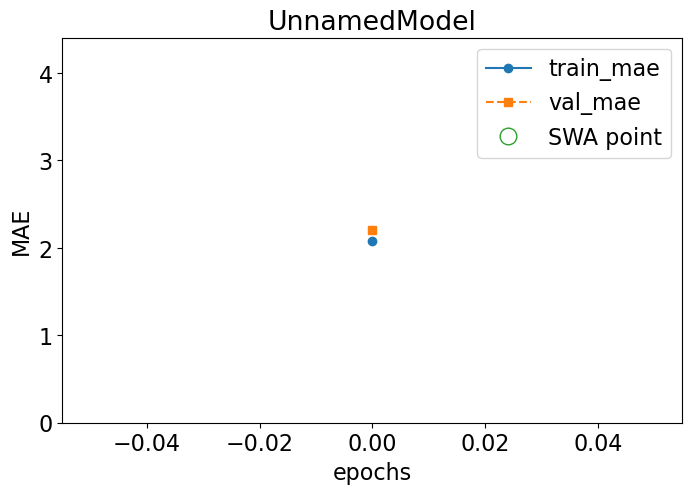

Epoch: 19/300 --- train mae: 0.934 val mae: 1.17


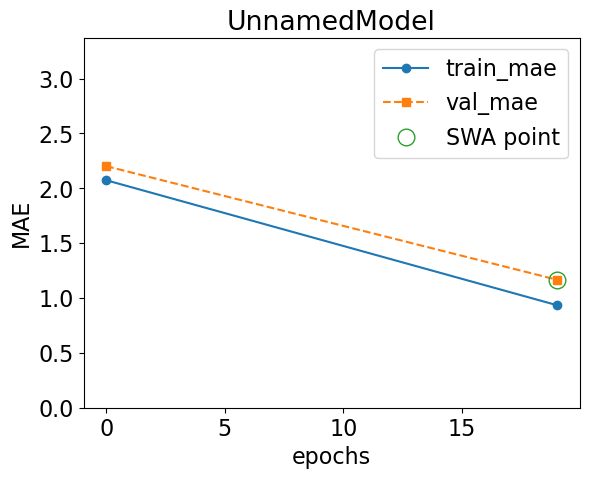

Epoch: 39/300 --- train mae: 0.649 val mae: 0.973


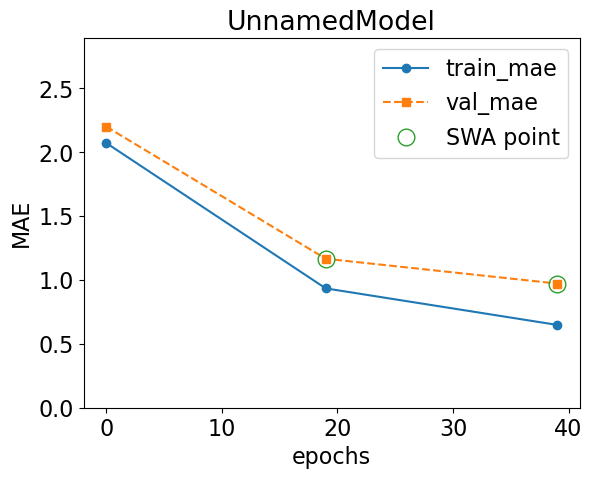

Epoch: 59/300 --- train mae: 0.463 val mae: 0.789


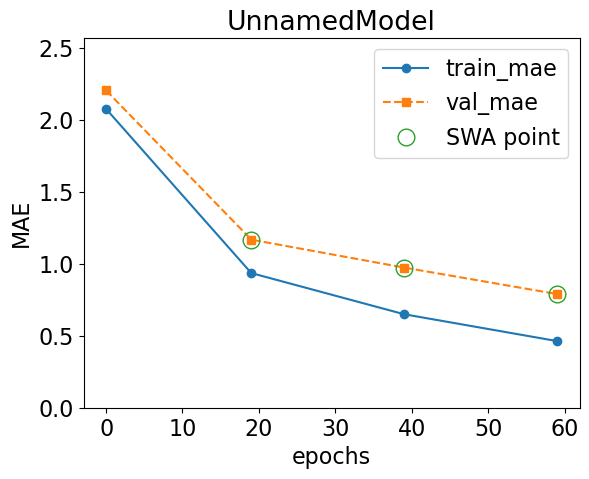

Epoch: 79/300 --- train mae: 0.418 val mae: 0.787


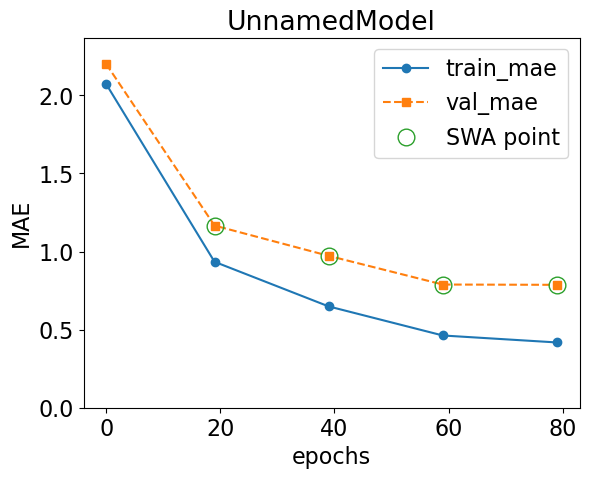

Epoch: 99/300 --- train mae: 0.384 val mae: 0.712


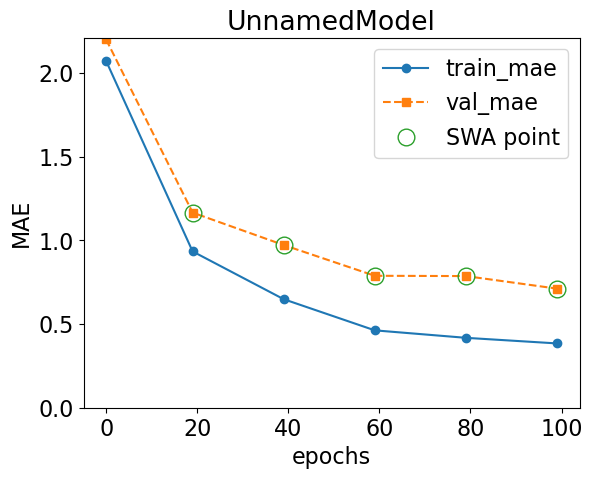

Epoch: 119/300 --- train mae: 0.328 val mae: 0.714


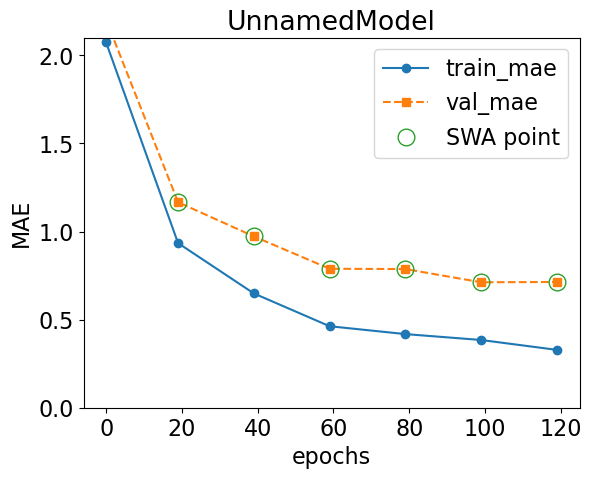

Epoch 139 failed to improve.
Discarded: 1/3 weight updates
Epoch: 139/300 --- train mae: 0.297 val mae: 0.731


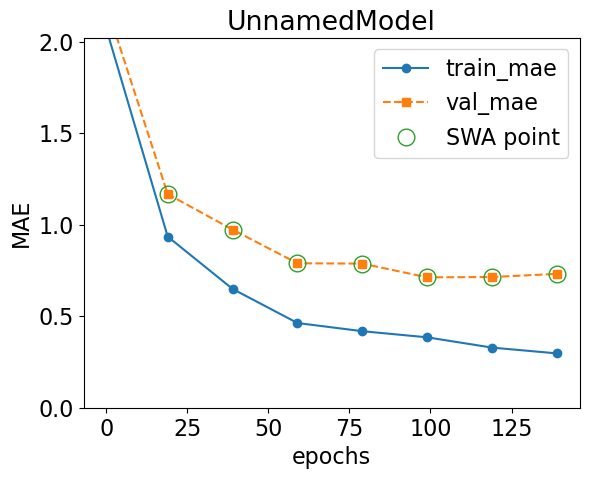

Epoch: 159/300 --- train mae: 0.277 val mae: 0.679


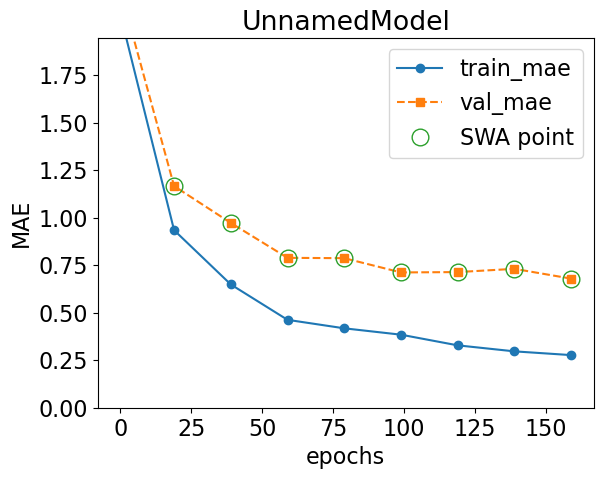

Epoch: 179/300 --- train mae: 0.26 val mae: 0.667


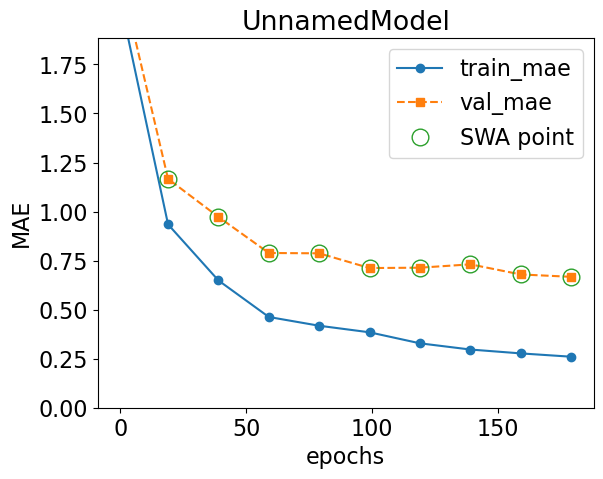

Epoch 199 failed to improve.
Discarded: 2/3 weight updates
Epoch: 199/300 --- train mae: 0.246 val mae: 0.682


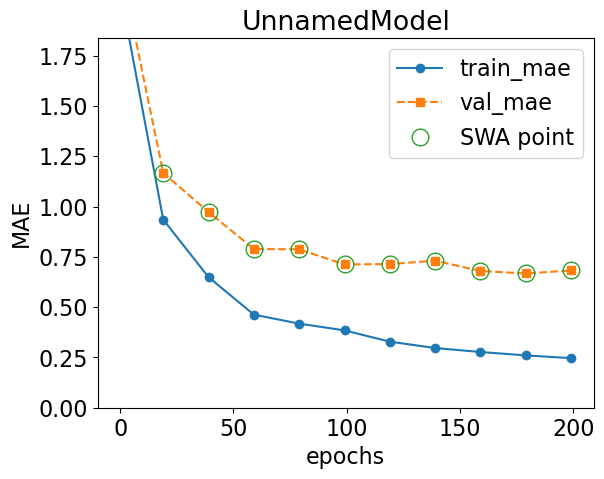

Epoch 219 failed to improve.
Discarded: 3/3 weight updates
Epoch: 219/300 --- train mae: 0.252 val mae: 0.686


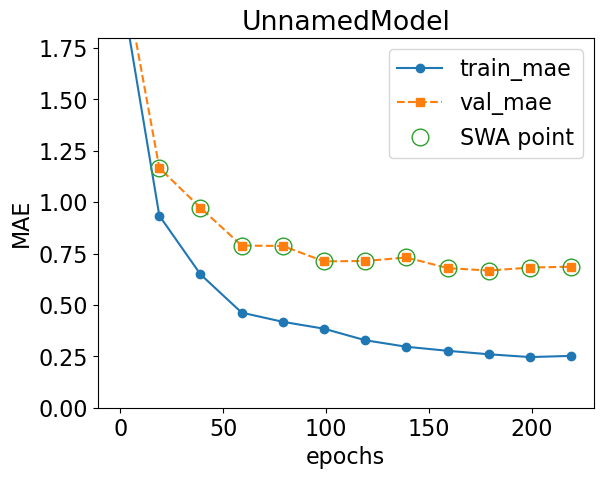

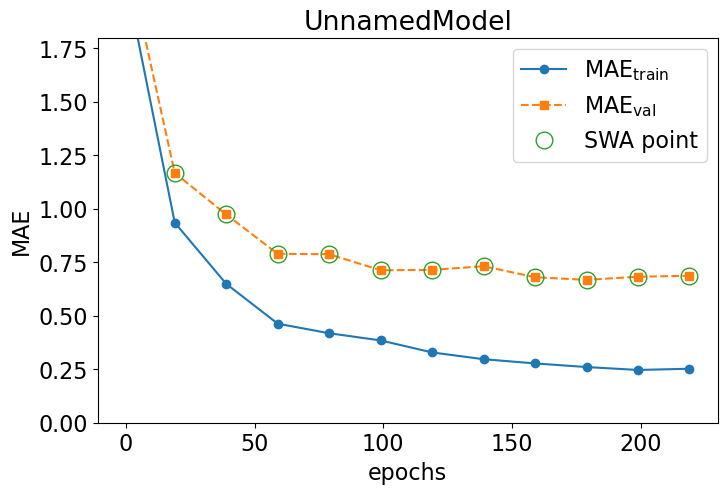

Discarded: 3/3weight updates, early-stopping now
Saving network (UnnamedModel) to models/trained_models/UnnamedModel.pth


In [21]:
models = {}

for prop in df1.columns[2:5]:

    train_df = pd.DataFrame()
    test_df = pd.DataFrame()
    
    train_df['formula'] = df_train['Formula']
    train_df['target'] = df_train[prop]

    test_df['formula'] = df_test['Formula']
    test_df['target'] = df_test[prop]
        
    cb = CrabNet(mat_prop="target",
                 d_model= 512,
                 heads=4,
                )
    cb.fit(train_df, test_df)
    models[prop] = cb

In [22]:
train_pred, train_sigma, test_pred, test_sigma = {}, {}, {}, {}

for prop in df1.columns[2:5]:

    train_df = pd.DataFrame()
    test_df = pd.DataFrame()
    
    train_df['formula'] = df_train['Formula']
    train_df['target'] = df_train[prop]

    test_df['formula'] = df_test['Formula']
    test_df['target'] = df_test[prop]

    train_pred[prop], train_sigma[prop] = models[prop].predict(train_df, return_uncertainty=True)
    test_pred[prop], test_sigma[prop] = models[prop].predict(test_df, return_uncertainty=True)


Generating EDM: 100%|██████████| 600/600 [00:00<00:00, 85904.84formulae/s]

loading data with up to 6 elements in the formula



Generating EDM: 100%|██████████| 226/226 [00:00<00:00, 86844.96formulae/s]


loading data with up to 6 elements in the formula


Generating EDM: 100%|██████████| 600/600 [00:00<00:00, 84613.76formulae/s]


loading data with up to 6 elements in the formula


Generating EDM: 100%|██████████| 226/226 [00:00<00:00, 86567.37formulae/s]


loading data with up to 6 elements in the formula


Generating EDM: 100%|██████████| 600/600 [00:00<00:00, 85700.06formulae/s]


loading data with up to 6 elements in the formula


Generating EDM: 100%|██████████| 226/226 [00:00<00:00, 87575.08formulae/s]

loading data with up to 6 elements in the formula


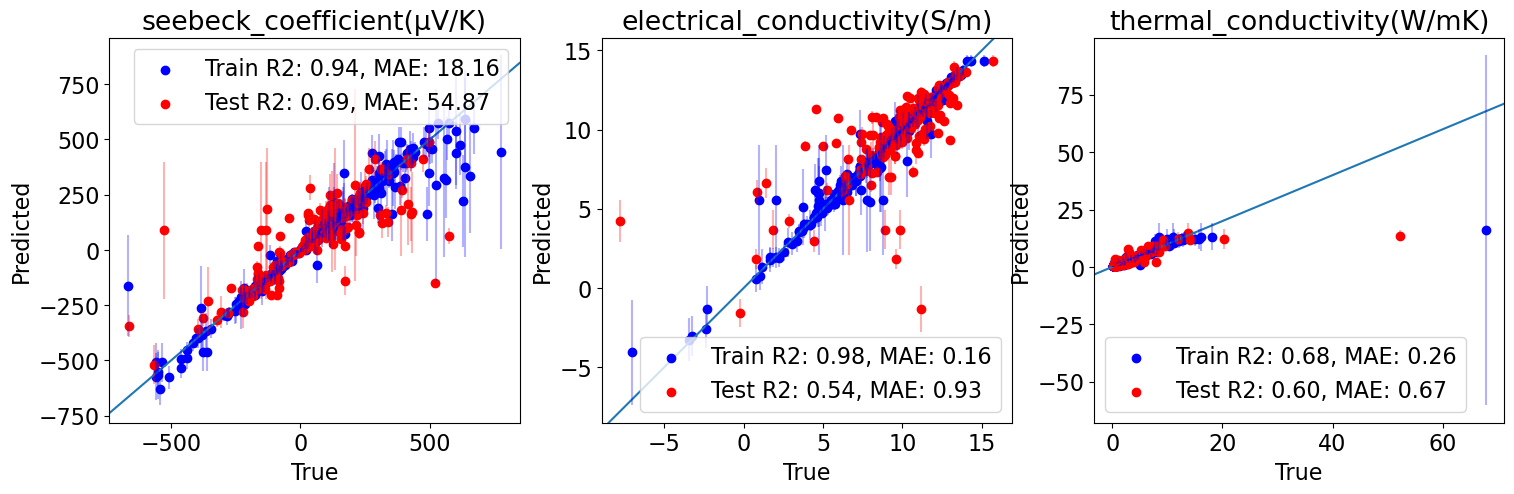

In [23]:
fig, ax = plt.subplots(ncols = 3, figsize = (18,5))

for i, prop in enumerate(df1.columns[2:5]):

    train_df = pd.DataFrame()
    test_df = pd.DataFrame()
    
    train_df['formula'] = df_train['Formula']
    train_df['target'] = df_train[prop]

    test_df['formula'] = df_test['Formula']
    test_df['target'] = df_test[prop]


    r2_train = r2_score(train_df['target'].to_numpy(), train_pred[prop])
    mae_train = mean_absolute_error(train_df['target'].to_numpy(), train_pred[prop])
    
    r2_test = r2_score(test_df['target'].to_numpy(), test_pred[prop])
    mae_test  = mean_absolute_error(test_df['target'].to_numpy(), test_pred[prop])

    ax[i].axline((1, 1), slope=1)
    ax[i].scatter(x=train_df['target'].to_numpy().ravel(),
                y=train_pred[prop].ravel(), label=f'Train R2: {r2_train:.2f}, MAE: {mae_train:.2f}', c='b',
              )
    ax[i].errorbar(x=train_df['target'].to_numpy().ravel(),
                y=train_pred[prop].ravel(),
                yerr=train_sigma[prop].ravel(),
               ls='none', c='b', alpha=0.3,)
    
    
    ax[i].scatter(x=test_df['target'].to_numpy().ravel(),
                y=test_pred[prop].ravel(), label=f'Test R2: {r2_test:.2f}, MAE: {mae_test:.2f}', c='r',
              )
    ax[i].errorbar(x=test_df['target'].to_numpy().ravel(),
                y=test_pred[prop].ravel(),
                yerr=test_sigma[prop].ravel(),
               ls='none', c='r', alpha=0.3,)
    
    
    ax[i].set_title(f'{prop}')
    ax[i].set_xlabel('True')
    ax[i].set_ylabel('Predicted')
    ax[i].legend()

In [48]:
train_df

,formula,target
207,Ca3Co3.7Ti0.3O9,2.300000
869,Cu3.0SbSe4,2.750000
3884,Ag2Se0.98,1.192000
3036,Ag(Bi0.9Nb0.1)0.9Sb0.1Se2,0.702426
1937,Ba8Ga15.88Zn0.007Sn30.12,0.937379
...,...,...
2953,AgSb0.99Mn0.01Te2,0.963300
2022,ZrNiPb0.995Bi0.005,9.737700
247,Cu3Sb0.9Ge0.1S4,2.100000
2097,Ag0.01Sn0.99Se0.8S0.2,0.198600


In [58]:
true_zt_test

2439    7.897080e+06
4210    1.708307e+07
2820    3.939834e+05
3309    4.018490e+05
2605    9.661926e+06
            ...     
5064    2.938557e+08
3809    4.875613e+07
2528    5.545386e+07
3662    1.164940e+06
806     9.281657e+07
Length: 226, dtype: float64

In [72]:
pred_zt_train

207     0.000035
869     0.000194
3884    0.000071
3036    0.000025
1937    0.000472
          ...   
2953    0.000026
2022    0.000011
247     0.000037
2097    0.001010
2600    0.000019
Name: temperature(K), Length: 600, dtype: float64

/homes/kaiyuana001/.conda/envs/crabnet/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in square
  after removing the cwd from sys.path.
/homes/kaiyuana001/.conda/envs/crabnet/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in square
  """
/homes/kaiyuana001/.conda/envs/crabnet/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in multiply
  """


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

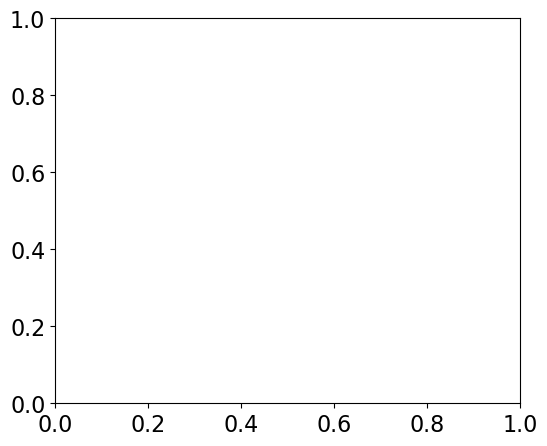

In [77]:
true_zt_train = df_train['ZT']
true_zt_test = df_test['ZT']

pred_zt_train = ((np.exp(train_pred['seebeck_coefficient(μV/K)'])*1e-6)**2) * train_pred['electrical_conductivity(S/m)'] * df_train['temperature(K)'] / train_pred['thermal_conductivity(W/mK)']
pred_zt_test = ((np.exp(test_pred['seebeck_coefficient(μV/K)'])*1e-6)**2) * test_pred['electrical_conductivity(S/m)'] * df_test['temperature(K)'] / test_pred['thermal_conductivity(W/mK)']

fig, ax = plt.subplots(ncols = 1, figsize = (6,5))

r2_train = r2_score(true_zt_train, pred_zt_train)
mae_train = mean_absolute_error(true_zt_train, pred_zt_train)

r2_test = r2_score(true_zt_test, pred_zt_test)
mae_test = mean_absolute_error(true_zt_test, pred_zt_test)

ax.axline((1, 1), slope=1)
ax.scatter(x=true_zt_train.to_numpy().ravel(),
            y=pred_zt_train.to_numpy().ravel(), label=f'Train R2: {r2_train:.2f}, MAE: {mae_train:.2f}', c='b',
          )

ax.scatter(x=true_zt_test.to_numpy().ravel(),
            y=pred_zt_test.to_numpy().ravel(), label=f'Test R2: {r2_test:.2f}, MAE: {mae_test:.2f}', c='r',
          )

ax.set_title(f'ZT')
ax.set_xlabel('True')
ax.set_ylabel('Predicted')
ax.legend()

In [65]:
df_train[true_zt_train>15]

,Formula,temperature(K),seebeck_coefficient(μV/K),electrical_conductivity(S/m),thermal_conductivity(W/mK),power_factor(W/mK2),ZT,reference
3873,Ag8SnSe6,330.0,-543.00,4.595120,0.2130,0.000029,0.045224,https://doi.org/10.1021/acsami.1c17548
3846,Ag8Sn0.4Ga0.6Se6,328.0,-552.34,3.496508,0.2108,0.000010,0.015665,https://doi.org/10.1021/acsami.1c17548
1058,LaCo0.9Fe0.1O3,300.0,598.80,3.673766,0.2568,0.000014,0.019300,dx.doi.org/10.1021/jp3021408
3860,Ag8Sn0.6Ga0.4Se6,330.0,-559.35,4.248495,0.2100,0.000022,0.052000,https://doi.org/10.1021/acsami.1c17548
3866,Ag8Sn0.7Ga0.3Se6,313.0,-549.53,3.496508,0.2161,0.000010,0.014434,https://doi.org/10.1021/acsami.1c17548


In [42]:
df_test[df_test['seebeck_coefficient(μV/K)']>500]

,Formula,temperature(K),seebeck_coefficient(μV/K),electrical_conductivity(S/m),thermal_conductivity(W/mK),power_factor(W/mK2),ZT,reference
2204,Cr2Ge2Te6,320.0,573.71,3.847484,0.9157,0.000015,0.005392,https://doi.org/10.1021/acs.chemmater.7b02346
134,Ag8GeTe6,329.0,519.00,4.553877,0.2530,0.000026,0.033276,10.1002/pssr.200701302
